In [1]:
# This line imports pandas, numpy, matplotlib.pyplot, and seaborn
%matplotlib widget
from admission_rate import *

<br/>

<hr style="border: 1px solid #fdb515;" />

# INSTRUCTOR VERSION

# Part 1: University-wide gender bias in 1973

## Background

In 1973, UC Berkeley was at risk of being sued for gender discrimination in their graduate admissions process. University records showed that they admitted 44% of their male applicants but only 35% of their female applicants. This ostensible case of bias against women turned out to be somewhat more nuanced. You will take the role of a statistician tasked to study **UC Berkeley's graduate admissions data in 1973**.

<br/>

<hr style="border: 1px solid #fdb515;" />

## Personal experience

<!-- BEGIN QUESTION -->
Statisticians can study published data to draw their conclusions, but as students of the university, we can typically only rely on personal experience and observations to form our impression of the university.

**Question 1:** Suppose it were 1973, and you were asked by a reporter to give your impression of whether the university's admission process may be biased in favour of one gender. Which pieces of information available from your personal observations would you use to make a quick assessment of gender bias (e.g. the number of male vs. female students in a typical introductory biology class)? Answers may vary.

**Question 2:** What are the potential limitations of this kind of "sensory" information in making an accurate assessment? (Consider statistical and systematic uncertainties.) Answers may vary.

*Your Answer Here*

**Instructor Solution:**

- Q1. Gender ratio in a typical class I attend. Gender ratio in public areas on campus. Gender ratio within my major cohort.

- Q2. Statistical uncertainty: Gender ratio may happen to be skewed one way or another in a class, especially a small one. Systematic uncertainty: If a major is male-dominated, it may simply be that the applicant pool is male-dominated, rather than that the admission process is biased.

## The data

<!-- End QUESTION -->

Now, you will take on the role of a statistician! Let's load Berkeley's admission data `berkeley.csv` below and show a few rows.

In [71]:
berkeley = pd.read_csv("berkeley.csv") # we load the prepared csv file containing the data into a pandas dataframe

berkeley # print a few rows from the dataframe

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


Each row represents a single applicant to UC Berkeley in 1973. The different columns are self-explanatory. We use single letters instead of the full names of the majors.

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 3:** Create a new dataframe `admission_rate_per_gender` by grouping the original dataset by gender. Your dataframe should have three columns: `Gender`, `app` (for number of applicants of each gender), and `adm` (for number of admitted students of each gender), to calculate the acceptance rate in the next question.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- <i>Hint 1: There should be only two rows for the table, one for gender F and one for gender M.</i> 
- <i>Hint 2: To count the number of rows in a dataframe satisfying a certain condition, write `np.sum(...condition...)`. For example, to count all rejected students in `berkeley`, write `np.sum(berkeley.Admission == 'Rejected')`.</i>
- <i>Hint 3: If you need two conditions to simultaneously hold, use the `&` operator for "and" and `|` operator for "or".</i>
- <i>Hint 4: Create a new dataframe using `pd.DataFrame.from_dict({'Column_A': [entryA1, entryA2], 'Column_B': [entryB1, entryB2], ...})`.</i>

</details>


In [ ]:
N_app_F = ... # number of female applicants
N_app_M = ... # number of male applicants
N_adm_F = ... # number of accepted female applicants
N_adm_M = ... # number of accepted male applicants

admission_per_gender = pd.DataFrame.from_dict({'Gender': ..., 'app': ..., 'adm': ...})

admission_per_gender

In [72]:
# Instructor Solution:

N_app_F = np.sum(berkeley.Gender == 'F')
N_app_M = np.sum(berkeley.Gender == 'M')
N_adm_F = np.sum((berkeley.Gender == 'F') & (berkeley.Admission == 'Accepted'))
N_adm_M = np.sum((berkeley.Gender == 'M') & (berkeley.Admission == 'Accepted'))

admission_per_gender = pd.DataFrame.from_dict({'Gender': ['F', 'M'], 'app': [N_app_F, N_app_M], 'adm': [N_adm_F, N_adm_M]})

admission_per_gender

,Gender,app,adm
0,F,4321,1494
1,M,8442,3738


<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 4:**
Calculate the acceptance rate for each gender and save the values as a new column called `p_adm` (for percentage of applicants admitted of each gender) in `admission_per_gender`. The acceptance rate should be the number of accepted applicants divided by number of applicants, for each gender.

<details open>

<summary><i>Click here for hint(s)</i></summary>

- *Hint 1: Add a new column to a dataframe simply by, for example, `dataframe['new_column'] = dataframe['old_column1'] + dataframe['old_column2']`*

</details>


In [ ]:
admission_per_gender['p_adm'] = ...

admission_per_gender

In [73]:
# Instructor Solution:

admission_per_gender['p_adm'] = admission_per_gender.adm / admission_per_gender.app

admission_per_gender

,Gender,app,adm,p_adm
0,F,4321,1494,0.345753
1,M,8442,3738,0.442786


At this point you should have reproduced the number we quoted in the beginning of the module: 44% acceptance rate for male, 35% acceptance rate for female. From *Calibration of Credence Levels*, you've learnt how important it is to attach error bars (i.e. confidence intervals) when you claim numerical figures. Let's estimate the error bars for the acceptance rates now.

## Error bars

Most news articles that reported on these figures immediately described the admission rates between male (44%) and female (35%) applicants as significantly different from each other. However, as critical thinkers, we should first ask ourselves if this difference could have arisen from chance alone.

Suppose UC Berkeley's admissions committee randomly admitted students from the applicant pool without looking at their applications. Surely, there would be no gender bias! Out of a pool of 4321 female and 8442 male applicants, let us randomly pick out 5232 students to admit. What is the acceptance rate among female applicants and among male applicants? Click the button below many times to see the result of each random draw.

Button(description='Randomly admit students!', layout=Layout(width='200px'), style=ButtonStyle(), tooltip='Ran…

Output()

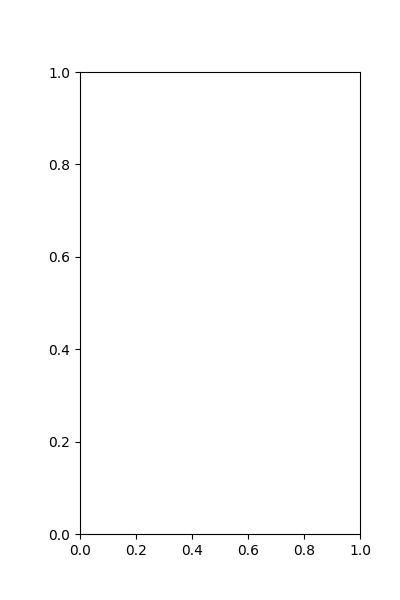

In [2]:
plotMockAdmissionWithButton()

**Question:** After many clicks, how big is the typical difference between male and female acceptance rates? What's the largest difference you were able to get, and after how many tries? Do you find it likely that a 44%/35% acceptance rate for male/female could have arisen by random chance, rather than a gender-based effect?

*Your Answer Here*

We would like to visualize this expected amount of fluctuation due to random chance as an error bar (or confidence interval) on the bar chart. This means that we need to quantify this number rather than observe it by eye. Thankfully, statistics has given us such a calculational tool, called the *standard deviation*, which roughly represents the range within which the randomly drawn value lies 68% of the time. In our case, every time we randomly pick 5232 students out of 4321 female and 8442 male applicants, the female or male acceptance rate fluctuates, but it stays within ±(standard deviation) roughly 68% of the time.

For this course, you do not need to know where the following formula comes from, but we want you to be able to implement the code that calculates it.

The standard deviation of the acceptance rate for female applicants, assuming applications are admitted by random without any gender consideration, is given by
$$\operatorname{StDev}(p_{\mathrm{app},F}) = \sqrt{\frac{N_{\mathrm{adm}}}{N_{\mathrm{app}}^2} \frac{1-p_{\mathrm{app},F}}{p_{\mathrm{app},F}}}.$$
Here, $N_{\mathrm{adm}}$ is the total number of admitted students, $N_{\mathrm{app}}$ is the total number of applicants, and $p_{\mathrm{app},F}$ is the proportion of female applicants. The standard deviation for the acceptance rate for male applicants is given by the same formula, just with $p_{\mathrm{app},M}$ instead of $p_{\mathrm{app},F}$. All you have to do is to use this formula to calculate the error bars.

If you are curious, here is a derivation of this formula:
<details open>

<summary><i>SPOILERS</i></summary>

This derivation will make sense if you have seen binomial distributions before.

Let us assume an unbiased admission process to be one that accepts applicants by random, without regards to their gender. This can be thought of as tossing a weighted coin whose heads-to-tails ratio is the same as the gender ratio in our applicant pool. This is also like drawing balls by random out of a bag filled with different numbers of black and white balls, with replacement. (Rigorously, the drawing is *without* replacement, but then our formulas will include the hypergeometric function, so let's simplify things for now.)

We model the acceptance of each student as a random variable following the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) whose probability of accepting a female applicant is $p_{\mathrm{app},F}$. If $N_{\mathrm{adm}}$ students are admitted, then the expected number of admitted female students is $N_{\mathrm{adm}}\,p_{\mathrm{app},F}$, and the variance in the number of admitted female students is
$$\operatorname{Var}(N_{\mathrm{adm},F}) = N_{\mathrm{adm}}\, p_{\mathrm{app},F}\,(1 - p_{\mathrm{app},F}).$$
The variance in the acceptance rate for female students is
$$\operatorname{Var}\left(\frac{N_{\mathrm{adm},F}}{N_{\mathrm{app},F}}\right) = \frac{\operatorname{Var}(N_{\mathrm{adm},F})}{N_{\mathrm{app},F}^2} = \frac{N_{\mathrm{adm}}\, p_{\mathrm{app},F}\,(1 - p_{\mathrm{app},F})}{N_{\mathrm{app},F}^2} = \frac{N_{\mathrm{adm}}\, p_{\mathrm{app},F}\,(1 - p_{\mathrm{app},F})}{N_{\mathrm{app}}^2\, p_{\mathrm{app},F}^2} = \frac{N_{\mathrm{adm}}}{N_{\mathrm{app}}^2} \frac{1-p_{\mathrm{app},F}}{p_{\mathrm{app},F}}.$$
The standard deviation is then the square root of this variance.

</details>

**Question 5:**
Add a new column to `admission_per_gender` called `err_p_adm` that stores the standard deviation of the acceptance rate for each gender, by implementing the formula above.

In [ ]:
N_app = ... # total number of applicants
N_adm = ... # total number of admitted students

admission_per_gender['p_app'] = ... # proportion of applicants who are M/F, as a new column
admission_per_gender['err_p_adm'] = ... # standard deviation in the acceptance rate, implementing the formula above

admission_per_gender

In [74]:
# Instructor Solution:

N_app = admission_per_gender.app.sum()
N_adm = admission_per_gender.adm.sum()

admission_per_gender['p_app'] = admission_per_gender.app / N_app
admission_per_gender['err_p_adm'] = np.sqrt(N_adm / N_app**2 * (1-admission_per_gender.p_app) / admission_per_gender.p_app)

admission_per_gender

,Gender,app,adm,p_adm,p_app,err_p_adm
0,F,4321,1494,0.345753,0.338557,0.007922
1,M,8442,3738,0.442786,0.661443,0.004055


You should obtain here that the typical fluctuation in acceptance rate is ±0.79% for female and ±0.41% for male. These will serve as our error bars.

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 7:** Using the updated `admission_per_gender` constructed in **Question 6**, create a `bar` plot showing each gender's admission rate together with its error bar. Documentation to plot a bar graph in `matplotlib` is linked [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).
* For this question, you can use any Python visualization method, including `seaborn` or `matplotlib` imported above. 
* Don't forget about the error bars! `bar`'s `yerr` parameter may be useful here!
* Set `capsize` parameter equal to 5.

In [ ]:
plt.bar(___, ___, yerr=___, capsize=5) # fill in the appropriate arguments
plt.ylabel('Acceptance rate within gender')
plt.show()

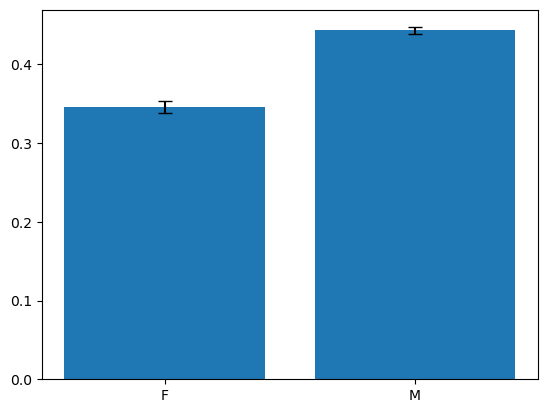

In [14]:
# Instructor Solution:

plt.bar(admission_per_gender.Gender, admission_per_gender.p_adm, yerr=admission_per_gender.err_p_adm, capsize=5)
plt.ylabel('Acceptance rate within gender')
plt.show()

<!-- END QUESTION -->


<!-- START QUESTION -->
**Question 8:**
We went through the hassle of estimating the error in the acceptance rate by gender and plotted it as an error bar. Why is this important? (Hint: The error we estimated shows how much the acceptance rate could fluctuate if students are accepted by being drawn out of the "bag" of applicants by random, without us looking into the bag to see their gender.)

**Question 9:** Do the two bars (for F and M) differ in height more than the sizes of their error bars? What does this mean? Is this what we would expect from an admission process devoid of gender bias? Could this difference have arisen by random chance?

*Note: Your interpretation should focus on connecting the visual data from the graph to possible conclusions about UC Berkeley's admission practices. Answer may vary.*

*Your Answer Here*

**Instructor Solution:**

- Q8: Without gender bias in the admission process, the acceptance rates for the two genders should be comparable. They don't have to be exactly equal, because even a totally random selection without regards to gender may result in a slight favour towards one gender just by chance. The error bars show how big this slight favour could be, so we may compare it to the actual difference between the acceptance rates to assess statistical significance.

- Q9: The two bars differ in height far more than the sizes of their error bars. This means that the difference in acceptance rates of the two genders is statistically significance. That is, it cannot have arisen from chance alone, without any gender bias in the admission process. Without gender bias, we would expect the two bars to be of comparable heights, with a difference smaller than the size of the error bars.

<br/>

<hr style="border: 1px solid #fdb515;" />

## *Discussion Portion*

**Question 10:** Based on the findings you made in this notebook, what claims and notes would you make in a report about UC Berkeley's admission process in 1973? Attach a credence level to any claims of fact. Think (very hard) of any alternative explanations (other than intentional gender bias) that may lead to the same pattern of data that you have obtained.

**Question 11:** Would you recommend any changes to the way UC Berkeley (in 1973) conducts their admission process?

*Your Answer Here*

**Instructor Solution:**

- Q10: I would report that there exists a significant gender bias in the admission process of UC Berkeley in 1973 in favour of male applicants (99%). This bias may be due to intentional sexism on the part of the admissions office, but can also be due to an inherent gender difference in which majors the applicants apply to or in the quality of applicants.

- Q11: (One possible answer) I would recommend that UC Berkeley implement a gender quota to ensure that that the acceptance rates are similar between male and female applicants. The quote may not be 50/50, but should reflect the gender ratio of the applicants. (Another possible answer) I would recommend that UC Berkeley remove the sex/gender label on all applicants, including their names, so that decisions may be made without regards to this visible piece of information.

<br/>

<hr style="border: 1px solid #fdb515;" />

End of the assignment! 😄 Great job! In about 7 weeks, we will revisit this data for a more detailed analysis, and we will reach a very different conclusion! Stay tuned for Part 2!